In [1]:
# import requirements
import json
import math
import os
import random
import shutil
import warnings
import pickle

import torch

import numpy
import matplotlib
import matplotlib.pyplot

from q3_solution import SimSiam


In [2]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
epochs = 1
dims = [2048, 4096]
sgs = [True, False]  # (True or False)
mlp_mode = [None, "no_pred_mlp"]  # None|'no_pred_mlp'
model_params = [["sgT", sgs[0], mlp_mode[0], dims[0]],
                ["sgF", sgs[1], mlp_mode[0], dims[0]],

                ["prP", sgs[0], mlp_mode[0], dims[0]],
                ["prN", sgs[0], mlp_mode[1], dims[0]],

                ["dim4096", sgs[0], mlp_mode[0], dims[1]]]

In [4]:
loggers = dict()
lst_experiment = ["sgT", "sgF", "prN", "dim4096"]
for expriment in lst_experiment:
    with open(f"logs/pretrain/log_{expriment}" + ".json", 'r') as f:
        loggers["pretrain_" + expriment] = json.load(f)

for expriment in lst_experiment:
    with open(f"logs/classification/log_{expriment}" + ".json", 'r') as f:
        loggers["classification_" + expriment] = json.load(f)

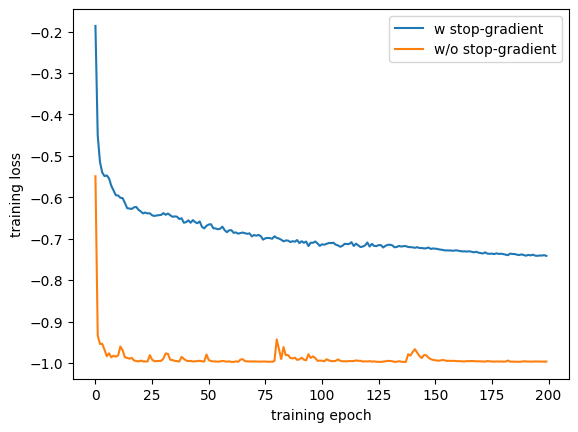

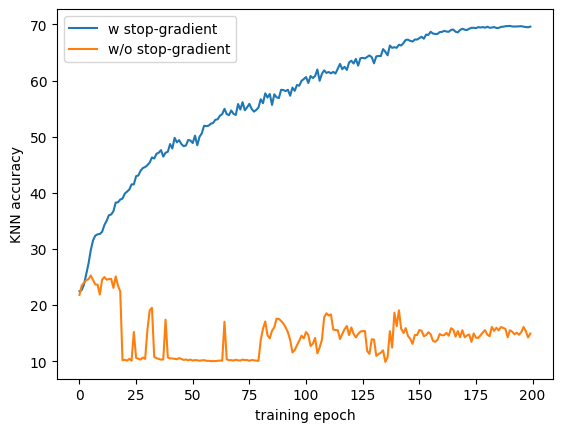

In [5]:
# p3q4  with and without gradient stopping

matplotlib.pyplot.figure("t_loss")
matplotlib.pyplot.plot(loggers["pretrain_sgT"]["t_loss"], label="w stop-gradient")
matplotlib.pyplot.plot(loggers["pretrain_sgF"]["t_loss"], label="w/o stop-gradient")

matplotlib.pyplot.xlabel("training epoch")
matplotlib.pyplot.ylabel("training loss")
matplotlib.pyplot.legend()
matplotlib.pyplot.savefig("results/p3q4_t_loss.pdf")

matplotlib.pyplot.figure("t_accu")
matplotlib.pyplot.plot(loggers["pretrain_sgT"]["t_accu"], label="w stop-gradient")
matplotlib.pyplot.plot(loggers["pretrain_sgF"]["t_accu"], label="w/o stop-gradient")

matplotlib.pyplot.xlabel("training epoch")
matplotlib.pyplot.ylabel("KNN accuracy")
matplotlib.pyplot.legend()
matplotlib.pyplot.savefig("results/p3q4_t_accu.pdf")
matplotlib.pyplot.show()

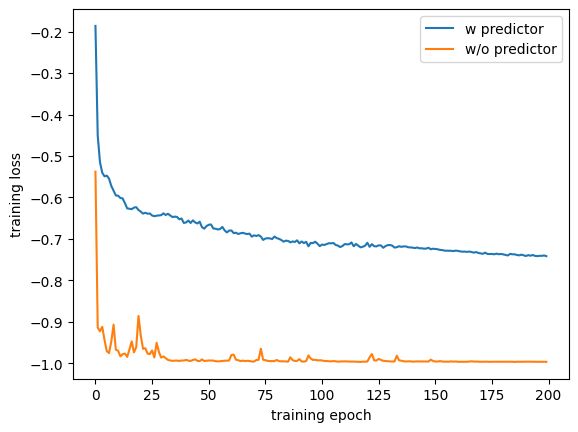

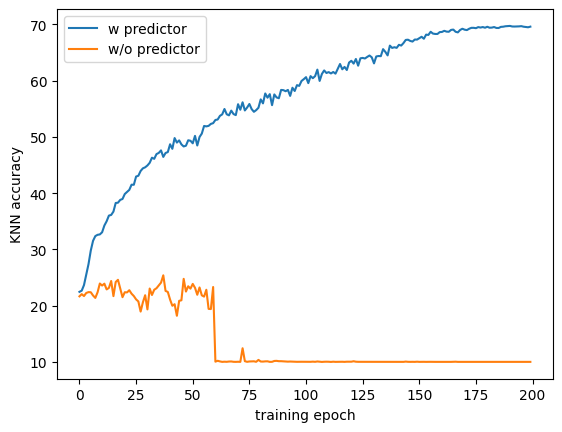

In [8]:
# p3q5a no predictor

matplotlib.pyplot.figure("t_loss")
matplotlib.pyplot.plot(loggers["pretrain_sgT"]["t_loss"], label="w predictor")
matplotlib.pyplot.plot(loggers["pretrain_prN"]["t_loss"], label="w/o predictor")

matplotlib.pyplot.xlabel("training epoch")
matplotlib.pyplot.ylabel("training loss")
matplotlib.pyplot.legend()
matplotlib.pyplot.savefig("results/p3q5a_t_loss.pdf")

matplotlib.pyplot.figure("t_accu")
matplotlib.pyplot.plot(loggers["pretrain_sgT"]["t_accu"], label="w predictor")
matplotlib.pyplot.plot(loggers["pretrain_prN"]["t_accu"], label="w/o predictor")

matplotlib.pyplot.xlabel("training epoch")
matplotlib.pyplot.ylabel("KNN accuracy")
matplotlib.pyplot.legend()
matplotlib.pyplot.savefig("results/p3q5a_t_accu.pdf")
matplotlib.pyplot.show()

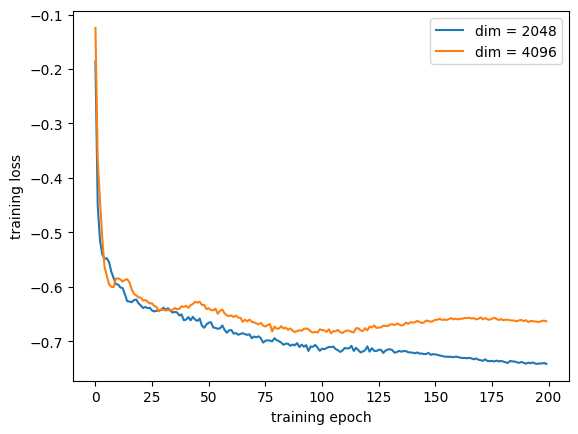

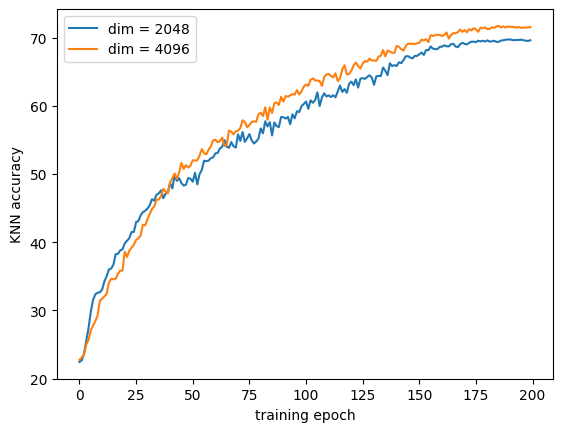

In [9]:
# p3q5b dim4096

matplotlib.pyplot.figure("t_loss")
matplotlib.pyplot.plot(loggers["pretrain_sgT"]["t_loss"], label="dim = 2048")
matplotlib.pyplot.plot(loggers["pretrain_dim4096"]["t_loss"], label="dim = 4096")

matplotlib.pyplot.xlabel("training epoch")
matplotlib.pyplot.ylabel("training loss")
matplotlib.pyplot.legend()
matplotlib.pyplot.savefig("results/p3q5b_t_loss.pdf")

matplotlib.pyplot.figure("t_accu")
matplotlib.pyplot.plot(loggers["pretrain_sgT"]["t_accu"], label="dim = 2048")
matplotlib.pyplot.plot(loggers["pretrain_dim4096"]["t_accu"], label="dim = 4096")

matplotlib.pyplot.xlabel("training epoch")
matplotlib.pyplot.ylabel("KNN accuracy")
matplotlib.pyplot.legend()
matplotlib.pyplot.savefig("results/p3q5b_t_accu.pdf")
matplotlib.pyplot.show()

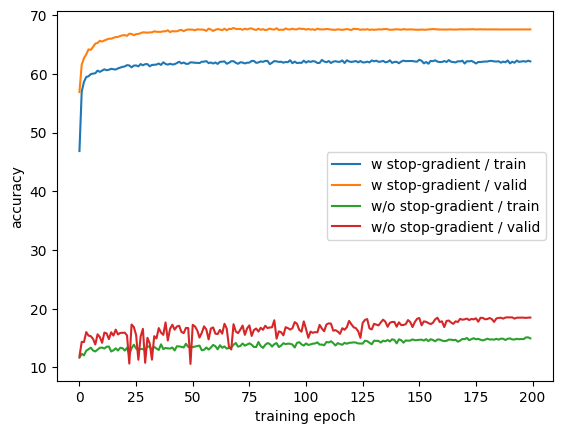

In [10]:
# p3q42  with and without gradient stopping

matplotlib.pyplot.figure("sg")
matplotlib.pyplot.plot(loggers["classification_sgT"]["t_accu"], label="w stop-gradient / train")
matplotlib.pyplot.plot(loggers["classification_sgT"]["v_accu"], label="w stop-gradient / valid")
matplotlib.pyplot.plot(loggers["classification_sgF"]["t_accu"], label="w/o stop-gradient / train")
matplotlib.pyplot.plot(loggers["classification_sgF"]["v_accu"], label="w/o stop-gradient / valid")

matplotlib.pyplot.xlabel("training epoch")
matplotlib.pyplot.ylabel("accuracy")
matplotlib.pyplot.legend()
matplotlib.pyplot.savefig("results/p3q4_class_accu.pdf")
matplotlib.pyplot.show()

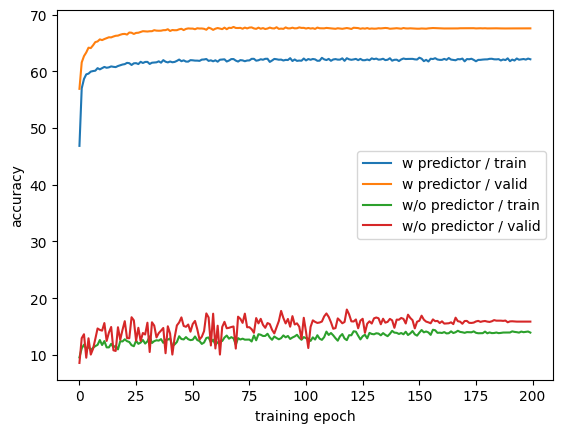

In [11]:
# p3q5a no predictor

matplotlib.pyplot.figure("predictor")
matplotlib.pyplot.plot(loggers["classification_sgT"]["t_accu"], label="w predictor / train")
matplotlib.pyplot.plot(loggers["classification_sgT"]["v_accu"], label="w predictor / valid")
matplotlib.pyplot.plot(loggers["classification_prN"]["t_accu"], label="w/o predictor / train")
matplotlib.pyplot.plot(loggers["classification_prN"]["v_accu"], label="w/o predictor / valid")

matplotlib.pyplot.xlabel("training epoch")
matplotlib.pyplot.ylabel("accuracy")
matplotlib.pyplot.legend()
matplotlib.pyplot.savefig("results/p3q5a_class_accu.pdf")
matplotlib.pyplot.show()

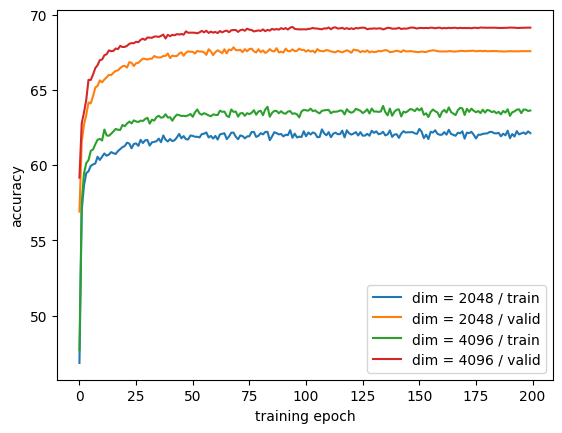

In [12]:
# p3q5b dim4096

matplotlib.pyplot.figure("dim4096")
matplotlib.pyplot.plot(loggers["classification_sgT"]["t_accu"], label="dim = 2048 / train")
matplotlib.pyplot.plot(loggers["classification_sgT"]["v_accu"], label="dim = 2048 / valid")
matplotlib.pyplot.plot(loggers["classification_dim4096"]["t_accu"], label="dim = 4096 / train")
matplotlib.pyplot.plot(loggers["classification_dim4096"]["v_accu"], label="dim = 4096 / valid")

matplotlib.pyplot.xlabel("training epoch")
matplotlib.pyplot.ylabel("accuracy")
matplotlib.pyplot.legend()
matplotlib.pyplot.savefig("results/p3q5b_class_accu.pdf")
matplotlib.pyplot.show()

In [12]:
# loggers["classification_sgT"]["t_accu"]
# loggers["classification_sgF"]["t_accu"]

# loggers["classification_sgT"]["v_accu"]
# loggers["classification_sgF"]["v_accu"]
